In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve, KFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
import random
from sklearn.svm import SVC
import sklearn.metrics as mt
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score,auc, roc_auc_score, roc_curve,confusion_matrix,classification_report

Using TensorFlow backend.


In [72]:
data = pd.read_csv("D:/UTD Fall 2020/ML/Assignment2/UCI_Credit_Card.csv", encoding= 'unicode_escape')
data.shape

(30000, 25)

In [83]:
#Viewing data
data.head()

,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,Sex_Male,Marriage_others,Marriage_single
0,-1.136720,0.21187,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,...,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1,-0.810161,-0.112812,-1.066471
1,-0.365981,0.21187,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,...,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1,-0.810161,-0.112812,0.937672
2,-0.597202,0.21187,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,...,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0,-0.810161,-0.112812,0.937672
3,-0.905498,0.21187,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,...,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0,-0.810161,-0.112812,-1.066471
4,-0.905498,0.21187,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,...,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0,1.234323,-0.112812,-1.066471


In [74]:
#structure of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [75]:
#checking for missing values
data.isnull().sum() 

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [76]:
#Feature Engineering and creating dummy variables
data["SEX"].unique()

array([2, 1], dtype=int64)

In [77]:
data['SEX']=np.where(data['SEX'] == 1, "Male", data['SEX'])
data['SEX']=np.where(data['SEX'] == "2", "Female", data['SEX'])
data['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [78]:
data['EDUCATION']=np.where(data['EDUCATION'] == 5, 4, data['EDUCATION'])
data['EDUCATION']=np.where(data['EDUCATION'] == 6, 4, data['EDUCATION'])
data['EDUCATION']=np.where(data['EDUCATION'] == 0, 4, data['EDUCATION'])
data['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

In [79]:
data['MARRIAGE']=np.where(data['MARRIAGE'] == 0, 3, data['MARRIAGE'])
data['MARRIAGE']=np.where(data['MARRIAGE'] == 1, "married", data['MARRIAGE'])
data['MARRIAGE']=np.where(data['MARRIAGE'] == "2", "single", data['MARRIAGE'])
data['MARRIAGE']=np.where(data['MARRIAGE'] == "3", "others", data['MARRIAGE'])

In [80]:
dummies_sex = pd.get_dummies(data['SEX'],prefix="Sex",drop_first=True)
dummies_marriage = pd.get_dummies(data['MARRIAGE'],prefix="Marriage",drop_first=True)
data = pd.concat([data,dummies_sex,dummies_marriage], axis=1)   
data=data.drop(columns =['ID','SEX','MARRIAGE'], axis = 1)

In [81]:
sc=StandardScaler()
data.iloc[:,0:21]=sc.fit_transform(data.iloc[:,0:21])
data.iloc[:,22:25]=sc.fit_transform(data.iloc[:,22:25])

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   EDUCATION                   30000 non-null  float64
 2   AGE                         30000 non-null  float64
 3   PAY_0                       30000 non-null  float64
 4   PAY_2                       30000 non-null  float64
 5   PAY_3                       30000 non-null  float64
 6   PAY_4                       30000 non-null  float64
 7   PAY_5                       30000 non-null  float64
 8   PAY_6                       30000 non-null  float64
 9   BILL_AMT1                   30000 non-null  float64
 10  BILL_AMT2                   30000 non-null  float64
 11  BILL_AMT3                   30000 non-null  float64
 12  BILL_AMT4                   30000 non-null  float64
 13  BILL_AMT5                   300

In [84]:
data_target=data[['default.payment.next.month']].values
data_predictors=data.drop(columns=['default.payment.next.month'],axis=1).values
x_train, x_test, y_train, y_test = train_test_split(data_predictors, data_target, test_size = 0.3, random_state = 0)

Define Functions

In [85]:
# Confusion Matrix Function
def confusionmat(y,y_pred):
  from sklearn.metrics import confusion_matrix,accuracy_score
  cm = confusion_matrix(y, y_pred)
  accu=accuracy_score(y,y_pred)
  print(cm,"\n")
  print("The accuracy is",accu)

In [86]:
# Learning curves
def learningcurve(model):
  print(model.history.keys())
  #accuracy learning curve
  plt.plot(model.history['accuracy'])
  plt.plot(model.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  #loss learning curve
  plt.plot(model.history['loss'])
  plt.plot(model.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [87]:
#Initializing ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(16,activation="relu"))

# Adding the second hidden layer
classifier.add(Dense(32,activation="relu"))

# Adding the output layer
classifier.add(Dense(1,activation="sigmoid"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

epoch=[100,250,500]

Train on 14699 samples, validate on 6301 samples
Epoch 1/100
14699/14699 [==============================] - 2s 119us/step - loss: 0.4824 - accuracy: 0.8005 - val_loss: 0.4654 - val_accuracy: 0.8091
Epoch 2/100
14699/14699 [==============================] - 2s 104us/step - loss: 0.4482 - accuracy: 0.8166 - val_loss: 0.4590 - val_accuracy: 0.8103
Epoch 3/100
14699/14699 [==============================] - 2s 102us/step - loss: 0.4436 - accuracy: 0.8201 - val_loss: 0.4538 - val_accuracy: 0.8100
Epoch 4/100
14699/14699 [==============================] - 2s 103us/step - loss: 0.4404 - accuracy: 0.8184 - val_loss: 0.4523 - val_accuracy: 0.8099
Epoch 5/100
14699/14699 [==============================] - 2s 104us/step - loss: 0.4377 - accuracy: 0.8199 - val_loss: 0.4521 - val_accuracy: 0.8108
Epoch 6/100
14699/14699 [==============================] - 2s 107us/step - loss: 0.4347 - accuracy: 0.8201 - val_loss: 0.4453 - val_accuracy: 0.8102
Epoch 7/100
14699/14699 [==============================] 

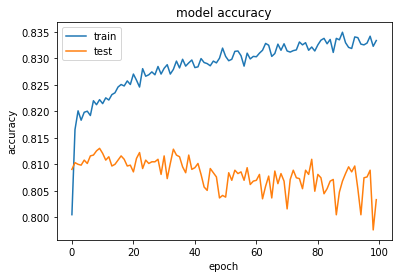

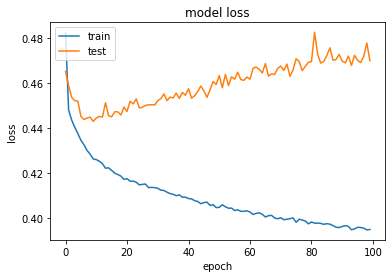

Train on 14699 samples, validate on 6301 samples
Epoch 1/250
14699/14699 [==============================] - 1s 93us/step - loss: 0.3939 - accuracy: 0.8321 - val_loss: 0.4731 - val_accuracy: 0.8073
Epoch 2/250
14699/14699 [==============================] - 1s 95us/step - loss: 0.3940 - accuracy: 0.8323 - val_loss: 0.4762 - val_accuracy: 0.8062
Epoch 3/250
14699/14699 [==============================] - 1s 96us/step - loss: 0.3947 - accuracy: 0.8336 - val_loss: 0.4739 - val_accuracy: 0.8094
Epoch 4/250
14699/14699 [==============================] - 1s 96us/step - loss: 0.3936 - accuracy: 0.8349 - val_loss: 0.4756 - val_accuracy: 0.8103
Epoch 5/250
14699/14699 [==============================] - 1s 96us/step - loss: 0.3942 - accuracy: 0.8345 - val_loss: 0.4707 - val_accuracy: 0.8081
Epoch 6/250
14699/14699 [==============================] - 1s 94us/step - loss: 0.3938 - accuracy: 0.8337 - val_loss: 0.4773 - val_accuracy: 0.8102
Epoch 7/250
14699/14699 [==============================] - 1s 8

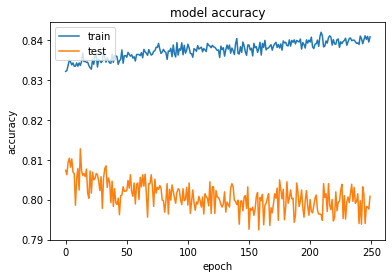

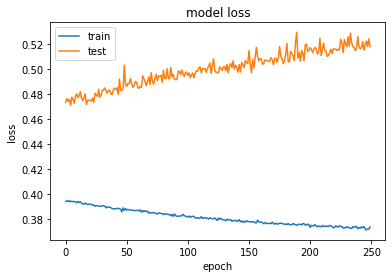

Train on 14699 samples, validate on 6301 samples
Epoch 1/500
14699/14699 [==============================] - 7s 456us/step - loss: 0.3727 - accuracy: 0.8394 - val_loss: 0.5185 - val_accuracy: 0.7938
Epoch 2/500
14699/14699 [==============================] - 6s 401us/step - loss: 0.3729 - accuracy: 0.8390 - val_loss: 0.5181 - val_accuracy: 0.7953
Epoch 3/500
14699/14699 [==============================] - 5s 335us/step - loss: 0.3716 - accuracy: 0.8409 - val_loss: 0.5190 - val_accuracy: 0.7980
Epoch 4/500
14699/14699 [==============================] - 4s 282us/step - loss: 0.3716 - accuracy: 0.8409 - val_loss: 0.5147 - val_accuracy: 0.7980
Epoch 5/500
14699/14699 [==============================] - 5s 315us/step - loss: 0.3720 - accuracy: 0.8407 - val_loss: 0.5180 - val_accuracy: 0.8000
Epoch 6/500
14699/14699 [==============================] - 5s 346us/step - loss: 0.3728 - accuracy: 0.8397 - val_loss: 0.5214 - val_accuracy: 0.7964
Epoch 7/500
14699/14699 [==============================] 

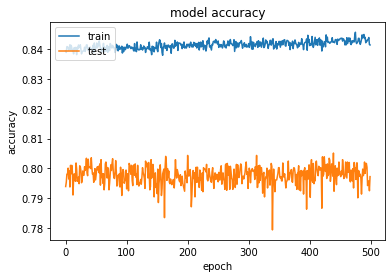

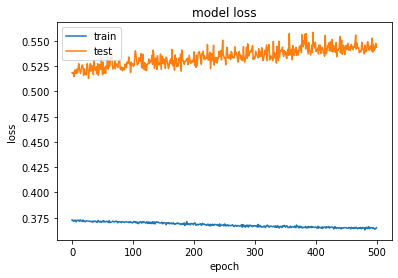

In [88]:
for e in epoch:
  # Fitting the ANN to the Training set
  model=classifier.fit(x_train, y_train, batch_size = 10, epochs=e,validation_split=0.3)
  # Predicting the Test set results
  y_pred = classifier.predict_classes(x_test)
  precision_score = mt.average_precision_score(y_test, y_pred)
  classifier.summary()
  test_results = classifier.evaluate(x_test, y_test)
  print("For epoch = {0}, the model test accuracy is {1}.".format(e,test_results[1]))
  print("The model test average precision score is {}.".format(precision_score))
  confusionmat(y_test,y_pred)
  learningcurve(model)


Adding another layer

Train on 14699 samples, validate on 6301 samples
Epoch 1/100
14699/14699 [==============================] - 6s 409us/step - loss: 0.4765 - accuracy: 0.8058 - val_loss: 0.4636 - val_accuracy: 0.8034
Epoch 2/100
14699/14699 [==============================] - 4s 280us/step - loss: 0.4482 - accuracy: 0.8154 - val_loss: 0.4541 - val_accuracy: 0.8089
Epoch 3/100
14699/14699 [==============================] - 8s 521us/step - loss: 0.4420 - accuracy: 0.8173 - val_loss: 0.4525 - val_accuracy: 0.8100
Epoch 4/100
14699/14699 [==============================] - 7s 466us/step - loss: 0.4375 - accuracy: 0.8187 - val_loss: 0.4485 - val_accuracy: 0.8088
Epoch 5/100
14699/14699 [==============================] - 6s 380us/step - loss: 0.4353 - accuracy: 0.8202 - val_loss: 0.4505 - val_accuracy: 0.8102
Epoch 6/100
14699/14699 [==============================] - 5s 341us/step - loss: 0.4323 - accuracy: 0.8201 - val_loss: 0.4535 - val_accuracy: 0.8092
Epoch 7/100
14699/14699 [==============================] 

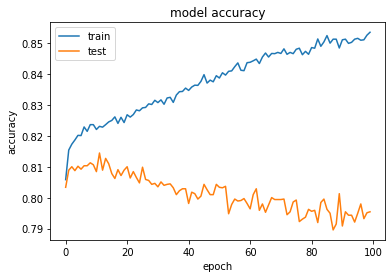

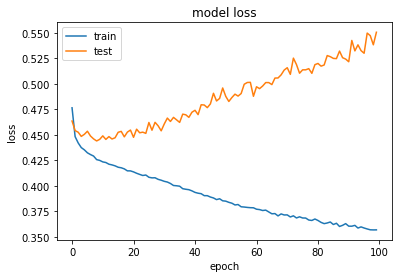

In [89]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(16,activation="relu"))

# Adding the second hidden layer
classifier.add(Dense(32,activation="relu"))

# Adding the third hidden layer
classifier.add(Dense(32,activation="relu"))

# Adding the output layer
classifier.add(Dense(1,activation="sigmoid"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model=classifier.fit(x_train, y_train, batch_size = 10, epochs=100,validation_split=0.3)
# Predicting the Test set results
y_pred = classifier.predict_classes(x_test)
precision_score = mt.average_precision_score(y_test, y_pred)
classifier.summary()
test_results = classifier.evaluate(x_test, y_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(precision_score))
confusionmat(y_test,y_pred)
learningcurve(model)

Train on 14699 samples, validate on 6301 samples
Epoch 1/100
14699/14699 [==============================] - 2s 104us/step - loss: 0.4602 - accuracy: 0.8089 - val_loss: 0.4507 - val_accuracy: 0.8115
Epoch 2/100
14699/14699 [==============================] - 1s 95us/step - loss: 0.4434 - accuracy: 0.8177 - val_loss: 0.4479 - val_accuracy: 0.8135
Epoch 3/100
14699/14699 [==============================] - 1s 96us/step - loss: 0.4406 - accuracy: 0.8174 - val_loss: 0.4440 - val_accuracy: 0.8129
Epoch 4/100
14699/14699 [==============================] - 1s 97us/step - loss: 0.4371 - accuracy: 0.8195 - val_loss: 0.4436 - val_accuracy: 0.8121
Epoch 5/100
14699/14699 [==============================] - 1s 97us/step - loss: 0.4342 - accuracy: 0.8193 - val_loss: 0.4446 - val_accuracy: 0.8116
Epoch 6/100
14699/14699 [==============================] - 1s 94us/step - loss: 0.4329 - accuracy: 0.8207 - val_loss: 0.4436 - val_accuracy: 0.8097
Epoch 7/100
14699/14699 [==============================] - 1s 

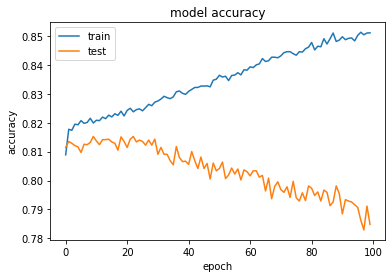

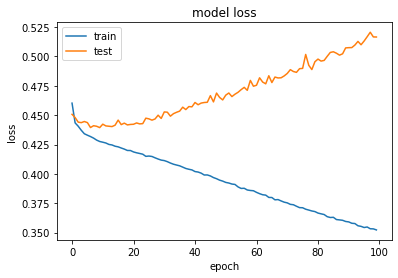

In [25]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(16,activation="tanh"))

# Adding the second hidden layer
classifier.add(Dense(32,activation="tanh"))

# Adding the output layer
classifier.add(Dense(1,activation="sigmoid"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model=classifier.fit(x_train, y_train, batch_size = 10, epochs=100,validation_split=0.3)
# Predicting the Test set results
y_pred = classifier.predict_classes(x_test)
precision_score = mt.average_precision_score(y_test, y_pred)
classifier.summary()
test_results = classifier.evaluate(x_test, y_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(precision_score))
confusionmat(y_test,y_pred)
learningcurve(model)

Train on 14699 samples, validate on 6301 samples
Epoch 1/100
14699/14699 [==============================] - 1s 99us/step - loss: 0.4748 - accuracy: 0.7977 - val_loss: 0.4515 - val_accuracy: 0.8062
Epoch 2/100
14699/14699 [==============================] - 1s 95us/step - loss: 0.4429 - accuracy: 0.8178 - val_loss: 0.4460 - val_accuracy: 0.8121
Epoch 3/100
14699/14699 [==============================] - 1s 94us/step - loss: 0.4370 - accuracy: 0.8201 - val_loss: 0.4445 - val_accuracy: 0.8124
Epoch 4/100
14699/14699 [==============================] - 1s 93us/step - loss: 0.4347 - accuracy: 0.8196 - val_loss: 0.4425 - val_accuracy: 0.8140
Epoch 5/100
14699/14699 [==============================] - 1s 93us/step - loss: 0.4324 - accuracy: 0.8209 - val_loss: 0.4414 - val_accuracy: 0.8142
Epoch 6/100
14699/14699 [==============================] - 1s 93us/step - loss: 0.4304 - accuracy: 0.8224 - val_loss: 0.4415 - val_accuracy: 0.8135
Epoch 7/100
14699/14699 [==============================] - 1s 9

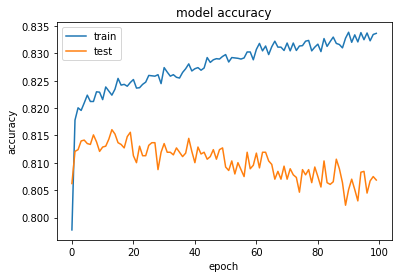

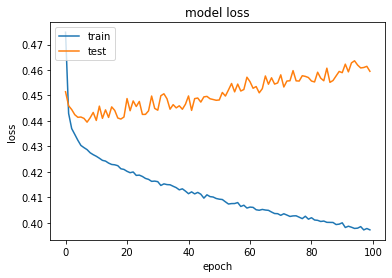

In [26]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(16,activation="tanh"))

# Adding the second hidden layer
classifier.add(Dense(32,activation="relu"))

# Adding the output layer
classifier.add(Dense(1,activation="sigmoid"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model=classifier.fit(x_train, y_train, batch_size = 10, epochs=100,validation_split=0.3)
# Predicting the Test set results
y_pred = classifier.predict_classes(x_test)
precision_score = mt.average_precision_score(y_test, y_pred)
classifier.summary()
test_results = classifier.evaluate(x_test, y_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(precision_score))
confusionmat(y_test,y_pred)
learningcurve(model)

Train on 14699 samples, validate on 6301 samples
Epoch 1/100
14699/14699 [==============================] - 5s 319us/step - loss: 0.5483 - accuracy: 0.7769 - val_loss: 0.5082 - val_accuracy: 0.7751
Epoch 2/100
14699/14699 [==============================] - 8s 530us/step - loss: 0.4758 - accuracy: 0.7769 - val_loss: 0.4623 - val_accuracy: 0.7751
Epoch 3/100
14699/14699 [==============================] - 5s 342us/step - loss: 0.4524 - accuracy: 0.8089 - val_loss: 0.4536 - val_accuracy: 0.8043
Epoch 4/100
14699/14699 [==============================] - 6s 420us/step - loss: 0.4483 - accuracy: 0.8115 - val_loss: 0.4513 - val_accuracy: 0.8037
Epoch 5/100
14699/14699 [==============================] - 7s 476us/step - loss: 0.4467 - accuracy: 0.8116 - val_loss: 0.4503 - val_accuracy: 0.8048
Epoch 6/100
14699/14699 [==============================] - 6s 376us/step - loss: 0.4449 - accuracy: 0.8116 - val_loss: 0.4498 - val_accuracy: 0.8054
Epoch 7/100
14699/14699 [==============================] 

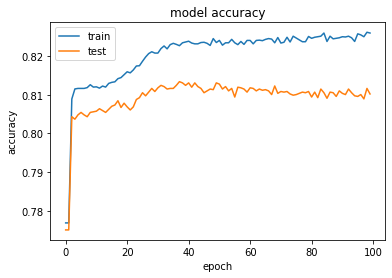

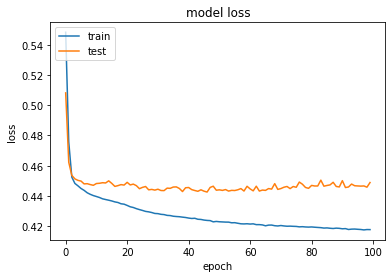

In [90]:
#Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(16,activation="softmax"))

# Adding the second hidden layer
classifier.add(Dense(32,activation="softmax"))

# Adding the output layer
classifier.add(Dense(1,activation="sigmoid"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model=classifier.fit(x_train, y_train, batch_size = 10, epochs=100,validation_split=0.3)
# Predicting the Test set results
y_pred = classifier.predict_classes(x_test)
precision_score = mt.average_precision_score(y_test, y_pred)
classifier.summary()
test_results = classifier.evaluate(x_test, y_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(precision_score))
confusionmat(y_test,y_pred)
learningcurve(model)

Train on 14699 samples, validate on 6301 samples
Epoch 1/100
14699/14699 [==============================] - 6s 394us/step - loss: 0.4789 - accuracy: 0.7963 - val_loss: 0.4716 - val_accuracy: 0.8078
Epoch 2/100
14699/14699 [==============================] - 7s 478us/step - loss: 0.4568 - accuracy: 0.8133 - val_loss: 0.4628 - val_accuracy: 0.8097
Epoch 3/100
14699/14699 [==============================] - 7s 472us/step - loss: 0.4532 - accuracy: 0.8177 - val_loss: 0.4607 - val_accuracy: 0.8078
Epoch 4/100
14699/14699 [==============================] - 7s 482us/step - loss: 0.4501 - accuracy: 0.8187 - val_loss: 0.4568 - val_accuracy: 0.8099
Epoch 5/100
14699/14699 [==============================] - 7s 457us/step - loss: 0.4468 - accuracy: 0.8182 - val_loss: 0.4541 - val_accuracy: 0.8099
Epoch 6/100
14699/14699 [==============================] - 6s 394us/step - loss: 0.4453 - accuracy: 0.8188 - val_loss: 0.4520 - val_accuracy: 0.8102
Epoch 7/100
14699/14699 [==============================] 

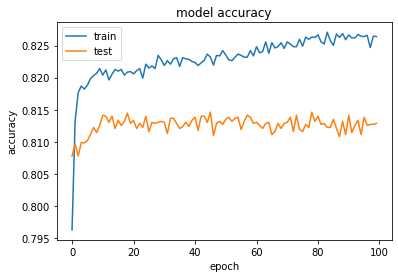

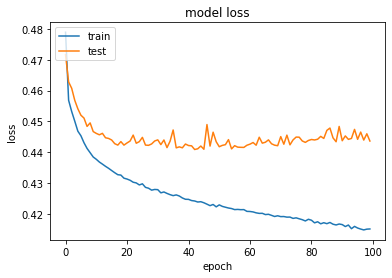

In [31]:
#Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(16,activation="sigmoid"))

# Adding the second hidden layer
classifier.add(Dense(32,activation="sigmoid"))

# Adding the output layer
classifier.add(Dense(1,activation="sigmoid"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model=classifier.fit(x_train, y_train, batch_size = 10, epochs=100,validation_split=0.3)
# Predicting the Test set results
y_pred = classifier.predict_classes(x_test)
precision_score = mt.average_precision_score(y_test, y_pred)
classifier.summary()
test_results = classifier.evaluate(x_test, y_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(precision_score))
confusionmat(y_test,y_pred)
learningcurve(model)

K-Nearest Neighbors  
Defining Functions

In [42]:
from sklearn.model_selection import learning_curve
def knn_learningcurve(c,data_predictors,data_target):
 train_sizes, train_scores, test_scores = learning_curve(c, 
                                                        data_predictors, 
                                                        data_target,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 training sets of different sizes
                                                        train_sizes=np.linspace(0.01, 1, 20))

# Means and standard deviations of 10 fold cv of training sets
 train_accu_mean = np.mean(train_scores, axis=1)
 train_accu_std = np.std(train_scores, axis=1)

# Means and standard deviations of 10 fold cv of test sets
 test_accu_mean = np.mean(test_scores, axis=1)
 test_accu_std = np.std(test_scores, axis=1)

# Draw lines
 plt.plot(train_sizes, train_accu_mean, color="green",  label="Training score")
 plt.plot(train_sizes, test_accu_mean, color="red", label="Cross-validation score")

# Draw bands
 plt.fill_between(train_sizes, train_accu_mean - train_accu_std, train_accu_mean + train_accu_std, color="#DDDDDD")
 plt.fill_between(train_sizes, test_accu_mean - test_accu_std, test_accu_mean + test_accu_std, color="#DDDDDD")

# Create plot
 plt.title("Learning Curve")
 plt.xlabel("Training Set Size"), plt.ylabel("Accuracy"), plt.legend(loc="best")
 plt.tight_layout()
 plt.show()

In [35]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
def kfold(x,y):
 return cross_val_score(estimator = classifier, X = x, y = y, cv = 10)

In [91]:
from sklearn.neighbors import KNeighborsClassifier
num_neighbors=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
KNNaccuracy=[]
accuracy_std=[]
for i in num_neighbors:
  # Fitting K-NN to the Training set
  classifier = KNeighborsClassifier(n_neighbors = i)
  model=classifier.fit(x_train, y_train)

  # Predicting the Test set results
  y_pred = classifier.predict(x_test)

  # 10 fold cross validation
  accuracies = kfold(x_train, y_train)

  KNNaccuracy+=[accuracies.mean()]
  accuracy_std+=[accuracies.std()]
  report=mt.classification_report(y_test,y_pred)
  confusionmat(y_test, y_pred)

  print("KNN with n= ",i)
  print("The Classification report\n",report,end='\n')
  print("The Accuracy score with only 1 Training and Testing Data Set\n",mt.accuracy_score(y_test,y_pred)*100,end='\n')
  #after using cross validation with 10 folds
  print("The mean of the accuracy scores with using 10 fold-cross validation\n",accuracies.mean()*100,end='\n')
  print("The Standard Deviation of the accuracy scores with using 10 fold-cross validation\n",accuracies.std()*100,end='\n')


C:\Users\Harini Babu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected

[[5822 1238]
 [1186  754]] 

The accuracy is 0.7306666666666667
KNN with n=  1
The Classification report
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      7060
           1       0.38      0.39      0.38      1940

    accuracy                           0.73      9000
   macro avg       0.60      0.61      0.61      9000
weighted avg       0.73      0.73      0.73      9000

The Accuracy score with only 1 Training and Testing Data Set
 73.06666666666666
The mean of the accuracy scores with using 10 fold-cross validation
 72.9095238095238
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.8701265318365464


C:\Users\Harini Babu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected

[[6690  370]
 [1533  407]] 

The accuracy is 0.7885555555555556
KNN with n=  2
The Classification report
               precision    recall  f1-score   support

           0       0.81      0.95      0.88      7060
           1       0.52      0.21      0.30      1940

    accuracy                           0.79      9000
   macro avg       0.67      0.58      0.59      9000
weighted avg       0.75      0.79      0.75      9000

The Accuracy score with only 1 Training and Testing Data Set
 78.85555555555555
The mean of the accuracy scores with using 10 fold-cross validation
 78.72857142857144
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.4537822906933878


C:\Users\Harini Babu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected

[[6253  807]
 [1263  677]] 

The accuracy is 0.77
KNN with n=  3
The Classification report
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      7060
           1       0.46      0.35      0.40      1940

    accuracy                           0.77      9000
   macro avg       0.64      0.62      0.63      9000
weighted avg       0.75      0.77      0.76      9000

The Accuracy score with only 1 Training and Testing Data Set
 77.0
The mean of the accuracy scores with using 10 fold-cross validation
 77.53333333333333
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.3517368630975128


C:\Users\Harini Babu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected

[[6682  378]
 [1470  470]] 

The accuracy is 0.7946666666666666
KNN with n=  4
The Classification report
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      7060
           1       0.55      0.24      0.34      1940

    accuracy                           0.79      9000
   macro avg       0.69      0.59      0.61      9000
weighted avg       0.76      0.79      0.76      9000

The Accuracy score with only 1 Training and Testing Data Set
 79.46666666666667
The mean of the accuracy scores with using 10 fold-cross validation
 79.43333333333334
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.2931183504097598


C:\Users\Harini Babu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected

[[6453  607]
 [1290  650]] 

The accuracy is 0.7892222222222223
KNN with n=  5
The Classification report
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      7060
           1       0.52      0.34      0.41      1940

    accuracy                           0.79      9000
   macro avg       0.68      0.62      0.64      9000
weighted avg       0.77      0.79      0.77      9000

The Accuracy score with only 1 Training and Testing Data Set
 78.92222222222223
The mean of the accuracy scores with using 10 fold-cross validation
 79.23333333333333
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.5270247641627632


C:\Users\Harini Babu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected

[[6709  351]
 [1429  511]] 

The accuracy is 0.8022222222222222
KNN with n=  6
The Classification report
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      7060
           1       0.59      0.26      0.36      1940

    accuracy                           0.80      9000
   macro avg       0.71      0.61      0.62      9000
weighted avg       0.77      0.80      0.77      9000

The Accuracy score with only 1 Training and Testing Data Set
 80.22222222222221
The mean of the accuracy scores with using 10 fold-cross validation
 80.1190476190476
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.4453081177430853


C:\Users\Harini Babu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected

[[6548  512]
 [1295  645]] 

The accuracy is 0.7992222222222222
KNN with n=  7
The Classification report
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      7060
           1       0.56      0.33      0.42      1940

    accuracy                           0.80      9000
   macro avg       0.70      0.63      0.65      9000
weighted avg       0.78      0.80      0.78      9000

The Accuracy score with only 1 Training and Testing Data Set
 79.92222222222222
The mean of the accuracy scores with using 10 fold-cross validation
 80.09047619047621
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.39004040723286043


C:\Users\Harini Babu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected

[[6719  341]
 [1416  524]] 

The accuracy is 0.8047777777777778
KNN with n=  8
The Classification report
               precision    recall  f1-score   support

           0       0.83      0.95      0.88      7060
           1       0.61      0.27      0.37      1940

    accuracy                           0.80      9000
   macro avg       0.72      0.61      0.63      9000
weighted avg       0.78      0.80      0.77      9000

The Accuracy score with only 1 Training and Testing Data Set
 80.47777777777779
The mean of the accuracy scores with using 10 fold-cross validation
 80.47142857142858
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.4759284993651208


C:\Users\Harini Babu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected

[[6608  452]
 [1304  636]] 

The accuracy is 0.8048888888888889
KNN with n=  9
The Classification report
               precision    recall  f1-score   support

           0       0.84      0.94      0.88      7060
           1       0.58      0.33      0.42      1940

    accuracy                           0.80      9000
   macro avg       0.71      0.63      0.65      9000
weighted avg       0.78      0.80      0.78      9000

The Accuracy score with only 1 Training and Testing Data Set
 80.4888888888889
The mean of the accuracy scores with using 10 fold-cross validation
 80.53809523809525
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.34995950526996444


C:\Users\Harini Babu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected

[[6713  347]
 [1380  560]] 

The accuracy is 0.8081111111111111
KNN with n=  10
The Classification report
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      7060
           1       0.62      0.29      0.39      1940

    accuracy                           0.81      9000
   macro avg       0.72      0.62      0.64      9000
weighted avg       0.78      0.81      0.78      9000

The Accuracy score with only 1 Training and Testing Data Set
 80.81111111111112
The mean of the accuracy scores with using 10 fold-cross validation
 80.67619047619047
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.4901755898079153


C:\Users\Harini Babu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected

[[6628  432]
 [1314  626]] 

The accuracy is 0.806
KNN with n=  11
The Classification report
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      7060
           1       0.59      0.32      0.42      1940

    accuracy                           0.81      9000
   macro avg       0.71      0.63      0.65      9000
weighted avg       0.78      0.81      0.78      9000

The Accuracy score with only 1 Training and Testing Data Set
 80.60000000000001
The mean of the accuracy scores with using 10 fold-cross validation
 80.80000000000001
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.527175333451356


C:\Users\Harini Babu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected

[[6715  345]
 [1375  565]] 

The accuracy is 0.8088888888888889
KNN with n=  12
The Classification report
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      7060
           1       0.62      0.29      0.40      1940

    accuracy                           0.81      9000
   macro avg       0.73      0.62      0.64      9000
weighted avg       0.78      0.81      0.78      9000

The Accuracy score with only 1 Training and Testing Data Set
 80.88888888888889
The mean of the accuracy scores with using 10 fold-cross validation
 80.83333333333333
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.4981826382393164


C:\Users\Harini Babu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected

[[6655  405]
 [1315  625]] 

The accuracy is 0.8088888888888889
KNN with n=  13
The Classification report
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      7060
           1       0.61      0.32      0.42      1940

    accuracy                           0.81      9000
   macro avg       0.72      0.63      0.65      9000
weighted avg       0.79      0.81      0.79      9000

The Accuracy score with only 1 Training and Testing Data Set
 80.88888888888889
The mean of the accuracy scores with using 10 fold-cross validation
 81.00000000000001
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.5722216718399926


C:\Users\Harini Babu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected

[[6719  341]
 [1384  556]] 

The accuracy is 0.8083333333333333
KNN with n=  14
The Classification report
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      7060
           1       0.62      0.29      0.39      1940

    accuracy                           0.81      9000
   macro avg       0.72      0.62      0.64      9000
weighted avg       0.78      0.81      0.78      9000

The Accuracy score with only 1 Training and Testing Data Set
 80.83333333333333
The mean of the accuracy scores with using 10 fold-cross validation
 81.07619047619048
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.5173629278301373


C:\Users\Harini Babu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected

[[6672  388]
 [1331  609]] 

The accuracy is 0.809
KNN with n=  15
The Classification report
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      7060
           1       0.61      0.31      0.41      1940

    accuracy                           0.81      9000
   macro avg       0.72      0.63      0.65      9000
weighted avg       0.79      0.81      0.78      9000

The Accuracy score with only 1 Training and Testing Data Set
 80.9
The mean of the accuracy scores with using 10 fold-cross validation
 81.08095238095238
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.6392491343618011


C:\Users\Harini Babu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected

[[6724  336]
 [1391  549]] 

The accuracy is 0.8081111111111111
KNN with n=  16
The Classification report
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      7060
           1       0.62      0.28      0.39      1940

    accuracy                           0.81      9000
   macro avg       0.72      0.62      0.64      9000
weighted avg       0.78      0.81      0.78      9000

The Accuracy score with only 1 Training and Testing Data Set
 80.81111111111112
The mean of the accuracy scores with using 10 fold-cross validation
 81.00952380952381
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.6876955504204068


C:\Users\Harini Babu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected

[[6693  367]
 [1348  592]] 

The accuracy is 0.8094444444444444
KNN with n=  17
The Classification report
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      7060
           1       0.62      0.31      0.41      1940

    accuracy                           0.81      9000
   macro avg       0.72      0.63      0.65      9000
weighted avg       0.79      0.81      0.78      9000

The Accuracy score with only 1 Training and Testing Data Set
 80.94444444444444
The mean of the accuracy scores with using 10 fold-cross validation
 80.98095238095239
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.7114865788807527


C:\Users\Harini Babu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected

[[6740  320]
 [1393  547]] 

The accuracy is 0.8096666666666666
KNN with n=  18
The Classification report
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      7060
           1       0.63      0.28      0.39      1940

    accuracy                           0.81      9000
   macro avg       0.73      0.62      0.64      9000
weighted avg       0.79      0.81      0.78      9000

The Accuracy score with only 1 Training and Testing Data Set
 80.96666666666667
The mean of the accuracy scores with using 10 fold-cross validation
 81.13333333333334
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.6556228106474546


C:\Users\Harini Babu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected

[[6707  353]
 [1352  588]] 

The accuracy is 0.8105555555555556
KNN with n=  19
The Classification report
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      7060
           1       0.62      0.30      0.41      1940

    accuracy                           0.81      9000
   macro avg       0.73      0.63      0.65      9000
weighted avg       0.79      0.81      0.78      9000

The Accuracy score with only 1 Training and Testing Data Set
 81.05555555555556
The mean of the accuracy scores with using 10 fold-cross validation
 81.11428571428571
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.7432843704322034


C:\Users\Harini Babu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected

[[6743  317]
 [1393  547]] 

The accuracy is 0.81
KNN with n=  20
The Classification report
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      7060
           1       0.63      0.28      0.39      1940

    accuracy                           0.81      9000
   macro avg       0.73      0.62      0.64      9000
weighted avg       0.79      0.81      0.78      9000

The Accuracy score with only 1 Training and Testing Data Set
 81.0
The mean of the accuracy scores with using 10 fold-cross validation
 81.09523809523809
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.6751165180360889


C:\Users\Harini Babu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected

[[6711  349]
 [1369  571]] 

The accuracy is 0.8091111111111111
KNN with n=  21
The Classification report
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      7060
           1       0.62      0.29      0.40      1940

    accuracy                           0.81      9000
   macro avg       0.73      0.62      0.64      9000
weighted avg       0.79      0.81      0.78      9000

The Accuracy score with only 1 Training and Testing Data Set
 80.91111111111111
The mean of the accuracy scores with using 10 fold-cross validation
 81.27142857142857
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.6969483205024934


C:\Users\Harini Babu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected

[[6760  300]
 [1396  544]] 

The accuracy is 0.8115555555555556
KNN with n=  22
The Classification report
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      7060
           1       0.64      0.28      0.39      1940

    accuracy                           0.81      9000
   macro avg       0.74      0.62      0.64      9000
weighted avg       0.79      0.81      0.78      9000

The Accuracy score with only 1 Training and Testing Data Set
 81.15555555555557
The mean of the accuracy scores with using 10 fold-cross validation
 81.22857142857143
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.6377397730584068


C:\Users\Harini Babu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected

[[6719  341]
 [1363  577]] 

The accuracy is 0.8106666666666666
KNN with n=  23
The Classification report
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      7060
           1       0.63      0.30      0.40      1940

    accuracy                           0.81      9000
   macro avg       0.73      0.62      0.65      9000
weighted avg       0.79      0.81      0.78      9000

The Accuracy score with only 1 Training and Testing Data Set
 81.06666666666666
The mean of the accuracy scores with using 10 fold-cross validation
 81.27142857142857
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.6754690987760732


C:\Users\Harini Babu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected

[[6757  303]
 [1391  549]] 

The accuracy is 0.8117777777777778
KNN with n=  24
The Classification report
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      7060
           1       0.64      0.28      0.39      1940

    accuracy                           0.81      9000
   macro avg       0.74      0.62      0.64      9000
weighted avg       0.79      0.81      0.78      9000

The Accuracy score with only 1 Training and Testing Data Set
 81.17777777777778
The mean of the accuracy scores with using 10 fold-cross validation
 81.22380952380952
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.6677032757139153


C:\Users\Harini Babu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected

[[6729  331]
 [1367  573]] 

The accuracy is 0.8113333333333334
KNN with n=  25
The Classification report
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      7060
           1       0.63      0.30      0.40      1940

    accuracy                           0.81      9000
   macro avg       0.73      0.62      0.65      9000
weighted avg       0.79      0.81      0.78      9000

The Accuracy score with only 1 Training and Testing Data Set
 81.13333333333334
The mean of the accuracy scores with using 10 fold-cross validation
 81.19047619047619
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.6724241184039547


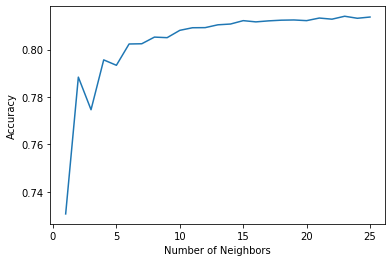

In [29]:
plt.plot(num_neighbors,KNNaccuracy)
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

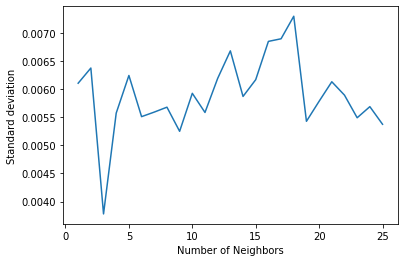

In [30]:
plt.plot(num_neighbors,accuracy_std)
plt.xlabel("Number of Neighbors")
plt.ylabel("Standard deviation")
plt.show()

Experimenting with Distance metrics

C:\Users\Harini Babu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: D

[[6743  317]
 [1350  590]] 

The accuracy is 0.8147777777777778
KNN with n=  23
The Classification report
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      7060
           1       0.65      0.30      0.41      1940

    accuracy                           0.81      9000
   macro avg       0.74      0.63      0.65      9000
weighted avg       0.79      0.81      0.79      9000

The Accuracy score with only 1 Training and Testing Data Set
 81.47777777777779


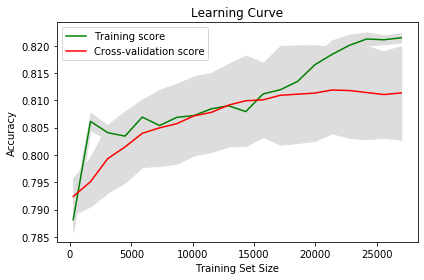

In [44]:
# Fitting K-NN to the Training set
classifier = KNeighborsClassifier(n_neighbors = 23,metric="manhattan")
model=classifier.fit(x_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(x_test)

# 10 fold cross validation
accuracies = kfold(x_train, y_train)
KNNaccuracy=accuracies.mean()
accuracy_std=accuracies.std()
report=mt.classification_report(y_test,y_pred)
confusionmat(y_test, y_pred)

print("KNN with n= ",23)
print("The Classification report\n",report,end='\n')
print("The test accuracy is\n",mt.accuracy_score(y_test,y_pred)*100,end='\n')

knn_learningcurve(classifier, data_predictors, data_target)

C:\Users\Harini Babu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: D

[[6700  360]
 [1358  582]] 

The accuracy is 0.8091111111111111
KNN with n=  23
The Classification report
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      7060
           1       0.62      0.30      0.40      1940

    accuracy                           0.81      9000
   macro avg       0.72      0.62      0.65      9000
weighted avg       0.79      0.81      0.78      9000

Test accuracy is
 80.91111111111111


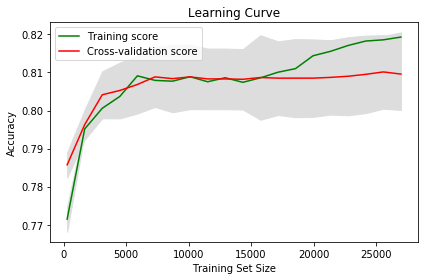

In [93]:
# Fitting K-NN to the Training set
classifier = KNeighborsClassifier(n_neighbors = 23,metric="chebyshev")
model=classifier.fit(x_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(x_test)

# 10 fold cross validation
accuracies = kfold(x_train, y_train)
KNNaccuracy=accuracies.mean()
accuracy_std=accuracies.std()
report=mt.classification_report(y_test,y_pred)
confusionmat(y_test, y_pred)

print("KNN with n= ",23)
print("The Classification report\n",report,end='\n')
print("Test accuracy is\n",mt.accuracy_score(y_test,y_pred)*100,end='\n')

knn_learningcurve(classifier, data_predictors, data_target)

C:\Users\Harini Babu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: D

[[6719  341]
 [1363  577]] 

The accuracy is 0.8106666666666666
KNN with n=  23
The Classification report
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      7060
           1       0.63      0.30      0.40      1940

    accuracy                           0.81      9000
   macro avg       0.73      0.62      0.65      9000
weighted avg       0.79      0.81      0.78      9000

Test accuracy is
 81.06666666666666


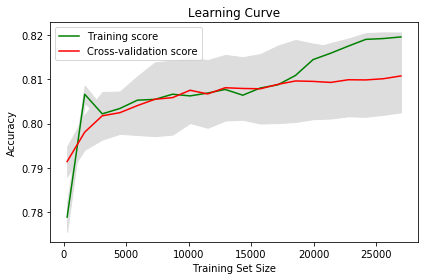

In [92]:
# Fitting K-NN to the Training set
classifier = KNeighborsClassifier(n_neighbors = 23,metric="euclidean")
model=classifier.fit(x_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(x_test)

# 10 fold cross validation
accuracies = kfold(x_train, y_train)
KNNaccuracy=accuracies.mean()
accuracy_std=accuracies.std()
report=mt.classification_report(y_test,y_pred)
confusionmat(y_test, y_pred)

print("KNN with n= ",23)
print("The Classification report\n",report,end='\n')
print("Test accuracy is\n",mt.accuracy_score(y_test,y_pred)*100,end='\n')

knn_learningcurve(classifier, data_predictors, data_target)